2024-10-11 09:53:09.686834: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-10-11 09:53:09.686860: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-10-11 09:53:09.686870: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-10-11 09:53:09.686891: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-11 09:53:09.686904: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)



Training ResNet50...
Epoch 1/5


2024-10-11 09:53:15.732933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


625/625 ━━━━━━━━━━━━━━━━━━━━ 4176s 7s/step - accuracy: 0.2967 - loss: 2.3212 - val_accuracy: 0.1224 - val_loss: 3.3655
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1336s 2s/step - accuracy: 0.6476 - loss: 1.0715 - val_accuracy: 0.7325 - val_loss: 0.7952
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1299s 2s/step - accuracy: 0.7555 - loss: 0.7490 - val_accuracy: 0.7590 - val_loss: 0.7322
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1285s 2s/step - accuracy: 0.8120 - loss: 0.5729 - val_accuracy: 0.7756 - val_loss: 0.7057
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1286s 2s/step - accuracy: 0.8627 - loss: 0.4277 - val_accuracy: 0.7735 - val_loss: 0.7326
313/313 - 22s - 72ms/step - accuracy: 0.7722 - loss: 0.7569


ResNet50 Test accuracy: 0.7721999883651733


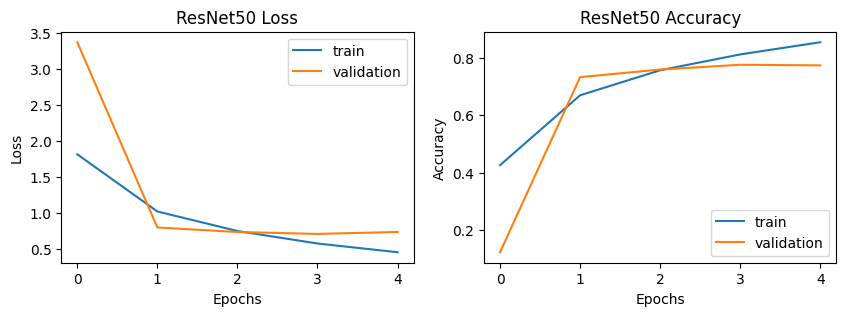

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


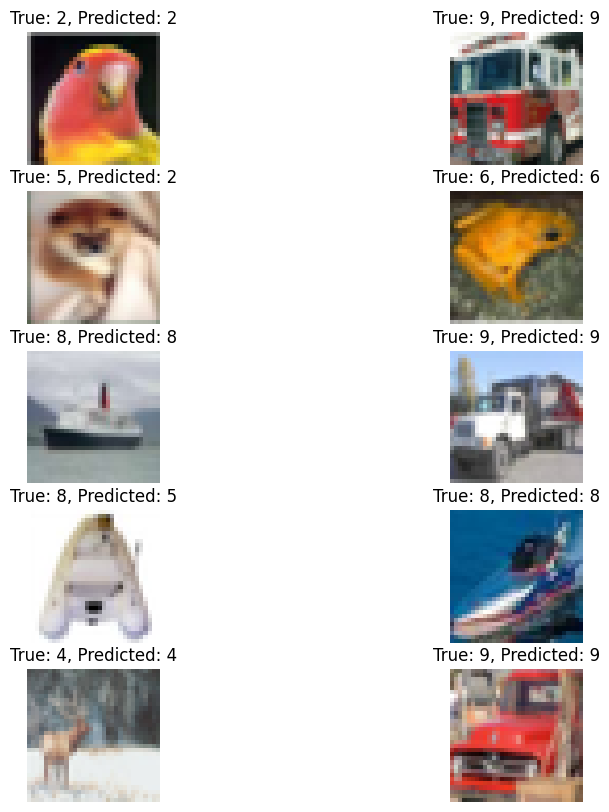

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step
ResNet50 Confusion Matrix
[[770  10  35   4  18   2  14  13  99  35]
 [ 25 828   3   3   3   1   9   6  56  66]
 [ 34   2 752  23  74  19  53  19  20   4]
 [ 10  13  74 542  59 129  83  39  30  21]
 [ 16   4  48  24 729  23  61  79  11   5]
 [  9   4  72 132  52 618  30  64  14   5]
 [  4  11  59  23  25  13 840   4  15   6]
 [ 13  10  26  28  25  18   8 853   5  14]
 [ 25  15   7   2   2   2   1   2 933  11]
 [ 28  62   6   6   1   3   2   2  33 857]]


In [1]:
%matplotlib inline
import numpy as np
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import VGG16, VGG19, ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Function to load CIFAR-10 data batches
def load_cifar10_data(file_paths):
    X, y = [], []
    for file_path in file_paths:
        with open(file_path, 'rb') as f:
            batch = pickle.load(f, encoding='bytes')
            X.append(batch[b'data'])
            y += batch[b'labels']
    X = np.vstack(X).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    X = X.astype('float32') / 255.0  # Normalize pixel values
    y = np.array(y)
    return X, y

# Function to load test batch
def load_test_batch(test_file_path):
    with open(test_file_path, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        X_test = batch[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype('float32') / 255.0
        y_test = np.array(batch[b'labels'])
    return X_test, y_test

# Paths to training and test batches
train_file_paths = [
    'data_batch_1',
    'data_batch_2',
    'data_batch_3',
    'data_batch_4',
    'data_batch_5'
]
test_file_path = 'test_batch'

# Load training and test data
X_train, y_train = load_cifar10_data(train_file_paths)
X_test, y_test = load_test_batch(test_file_path)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Function to build, compile and train model
def build_and_train_model(base_model, model_name):
    # 构建模型
    model = Sequential([
        base_model,
        Flatten(),
        BatchNormalization(),  # 添加 Batch Normalization 层
        Dense(128, activation='relu'),
        Dropout(0.5),  # 添加 Dropout 层来防止过拟合
        Dense(10, activation='softmax')  # CIFAR-10 有 10 个类别
    ])

    # 编译模型
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # 训练模型
    history = model.fit(X_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

    # 评估模型
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print(f"{model_name} Test accuracy: {test_acc}")

    # 保存模型
    model.save(f'{model_name}_CIFAR10_weights.h5')

    # 绘制训练和验证损失
    plt.figure(figsize=(10, 3))
    plt.subplot(121)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    # 绘制训练和验证准确率
    plt.subplot(122)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    plt.show()

    plt.figure(figsize=(10, 10))
    for i in range(10):
        index = np.random.randint(0, len(X_test))
        plt.subplot(5, 2, i + 1)
        plt.imshow(X_test[index])
        pred_label = np.argmax(model.predict(X_test[index:index + 1]))
        true_label = np.argmax(y_test[index])
        plt.title(f'True: {true_label}, Predicted: {pred_label}')
        plt.axis('off')
    plt.show()

    # Confusion matrix
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    conf_mat = confusion_matrix(y_true, y_pred)
    print(f'{model_name} Confusion Matrix')
    print(conf_mat)

# List of models to train and evaluate
models_to_train = {
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
}

# Train and evaluate each model
for model_name, base_model in models_to_train.items():
    print(f"\nTraining {model_name}...")
    build_and_train_model(base_model, model_name)


313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step


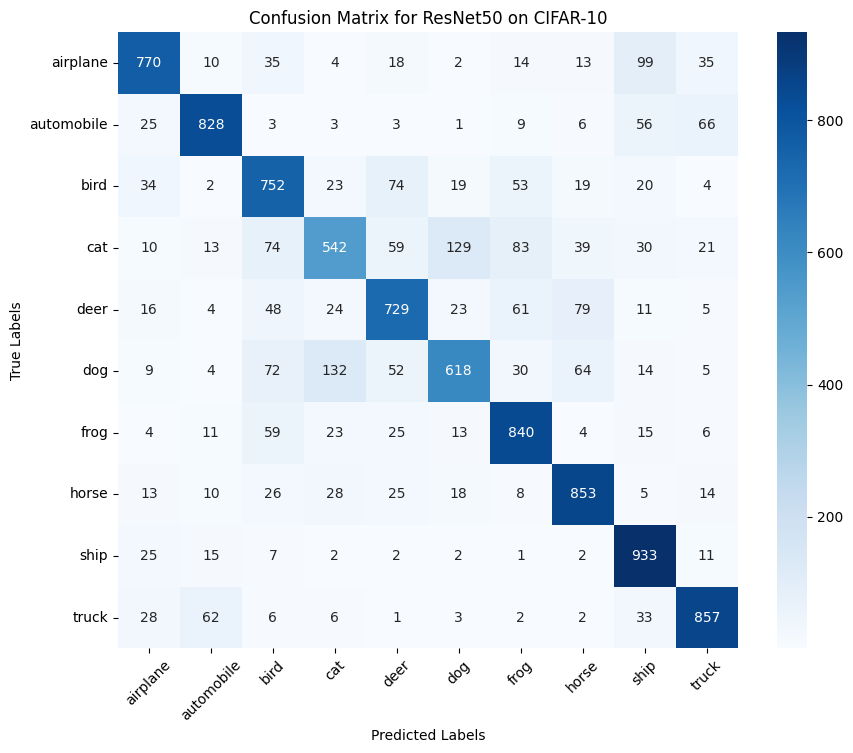

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the previously saved ResNet50 model
ResNet50_model = load_model('ResNet50_CIFAR10_weights.h5')

# Generate the predictions and confusion matrix
y_pred = np.argmax(ResNet50_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Create confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Print and visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for ResNet50 on CIFAR-10')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()
